#Домашнее задание №2
---
### Когортный анализ
### По курсу: Специальные главы математики


Были собраны данные по продажам, динамике продаж, доле рынка и региональном распределении электромобилей в период с 2010 по 2024 год (Датасет «Продажи электромобилей (2010–2024)»). Набор данных содержит следующие ключевые характеристики:

1. регион — географическая область (например, Китай, США, Европа);
2. категория — тип данных (исторические или прогнозные);
3. параметр — анализируемый показатель

(например, объем продаж, доля EV на рынке);
4. mode — вид транспорта (легковые автомобили);
5. трансмиссия — тип электромобиля:

BEV (аккумуляторный),

PHEV (подключаемый гибрид),

EV (общий сегмент);


6. year — год данных (2010–2024);
7. единица измерения — штуки (транспортных средств) или проценты (%);
9. значение — численный показатель (например, 10 000 проданных EV или 5% рыночной доли).

## Содержательная постановка задачи:

В рамках данного исследования проводится когортный анализ датасета «Продажи электромобилей (2010–2024)», содержащего детализированные данные о динамике развития мирового рынка электромобилей. Анализ направлен на выявление ключевых закономерностей, характеризующих эволюцию спроса и предложения на электромобили в различных регионах мира.

Цель анализа — провести когортный анализ для выявления закономерностей в развитии рынка электромобилей, оценить динамику продаж по годам выпуска (когортам), определить ключевые регионы-лидеры.


## Признак формирования когорт
Когорты сгруппированы по двум ключевым критериям:
1.	Временной признак

Регионы распределены по году первого значимого объема продаж электромобилей (EV):
1. Ранние (2010–2012): первые рынки с массовым adoption (Китай, США, Германия).
2. Средние (2013–2016): регионы с умеренным стартом (Австралия, Бразилия, Восточная Европа).
3. Поздние (2017–2023): новые или медленно растущие рынки (Индия, Чили, Колумбия).

Такой подход позволяет оценить, как время выхода технологии влияет на динамику развития: кривые обучения, скорость роста, зрелость инфраструктуры.

2.	Географический признак

Дополнительная стратификация внутри временных групп по макрорегионам и их специфике:
1. Европа: высокие темпы роста (CAGR > 30%) благодаря регуляторной поддержке.
2. Азия: доминирование Китая vs отставание Японии из-за различий в политике субсидий.
3. Америка: контраст между развитыми рынками (США, Канада) и зарождающимися (Латинская Америка).

Это помогает выявить региональные паттерны: влияние климата, логистики, местного протекционизма.

## Зачем комбинировать оба признака?

Пример: Китай (ранний) и Индия (поздний) попадают в разные временные когорты, но их сравнение в рамках азиатского кластера показывает, как стартовые условия (инфраструктура, господдержка) ускоряют или тормозят развитие даже при схожем культурно-экономическом контексте.


## Размер когорт
Размер когорт измеряется:
1. Количеством проданных EV в год формирования когорты.
2. Долей EV в общих продажах автомобилей (метрика EV sales share).

Год первой продажи определяет момент старта и позволяет сравнивать регионы на одинаковых этапах развития.
Количество продаж и доля EV показывают интенсивность внедрения технологии в разных регионах.

Такой подход помогает понять:
1. Какие рынки быстрее адаптируются к EV (высокая доля с самого начала).
2. Где потенциал роста выше (большие объёмы, но низкая начальная доля).

## Период формирования отчета
Анализ охватывает данные с 2010 по 2023 год, что позволяет:
1. Выявить долгосрочные тренды.
2. Сравнить динамику между ранними и поздними когортами.


## Ключевые метрики
Для анализа использованы:
1. EV sales share – доля продаж EV от общего числа автомобилей.
2. EV stock share – доля EV в общем парке автомобилей.
3. Рост продаж (CAGR) по когортам.
4. Среднее время удвоения доли EV в продажах.


## Реализация метода
Алгоритм анализа:
1. Группировка данных по регионам и годам первой продажи EV.
2. Расчет метрик для каждой когорты:
3. Средний годовой прирост EV sales share.
4. Сравнение динамики между BEV (электромобили) и PHEV (гибриды).
5. Визуализация через line-plot (тренды) и heatmap (сравнение регионов).


## Ссылка на датасет
https://www.kaggle.com/datasets/jainaru/electric-car-sales-2010-2024

## Подключение необходимых библиотек

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive

## Настройка отображения

In [32]:
# Настройки отображения
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Загрузка и предварительная обработка данных

В датасете есть строки с другими параметрами, например:
1. parameter = "EV stock" (парк EV на дорогах),
2. parameter = "EV stock share" (доля EV в общем парке),
3. parameter = "Electricity demand" (потребление электроэнергии).

Эти данные не относятся к продажам, но могут быть полезны для других анализов (например, расчета среднего времени владения). Для когортного анализа продаж они избыточны.
  
Поэтому необходимо:
1.	Оставить только записи с продажами EV:
Удалить строки, где powertrain не является BEV, PHEV или FCEV.


In [24]:
def load_and_preprocess_data(filepath):
    # Загрузка данных
    df = pd.read_csv(filepath)

    # Проверка и очистка данных
    print(f"Первоначальный размер данных: {df.shape}")
    print(f"Пропущенные значения:\n{df.isnull().sum()}")

    # Удаление дубликатов
    df = df.drop_duplicates()
    print(f"Размер после удаления дубликатов: {df.shape}")

    # Фильтрация только нужных данных (Historical, Cars)
    df = df[(df['category'] == 'Historical') & (df['mode'] == 'Cars')]

    # 1. Фильтрация по параметрам - оставляем только данные о продажах и доле рынка
    df = df[df['parameter'].isin(['EV sales', 'EV sales share'])]
    print(f"Размер после фильтрации по параметрам: {df.shape}")

    # 2. Фильтрация по типам электромобилей (только для продаж)
    df_sales = df[df['parameter'] == 'EV sales']
    df_sales = df_sales[df_sales['powertrain'].isin(['BEV', 'PHEV', 'FCEV'])]

    # 3. Удаление аномалий
    # Удаление нулевых/отрицательных значений
    df_sales = df_sales[df_sales['value'] > 0]

    # Удаление регионов с продажами < 10 единиц в год
    df_sales = df_sales.groupby(['region', 'year']).filter(lambda x: x['value'].sum() >= 10)
    print(f"Размер после удаления аномалий: {df_sales.shape}")

    # Объединяем обратно с данными о доле рынка
    df_share = df[df['parameter'] == 'EV sales share']
    df = pd.concat([df_sales, df_share])

    # Преобразование года в datetime для удобства анализа
    df['year'] = pd.to_datetime(df['year'], format='%Y')

    # Создание когорт по регионам и годам
    df['cohort_year'] = df.groupby('region')['year'].transform('min').dt.year
    df['years_since_cohort'] = df['year'].dt.year - df['cohort_year']

    # Добавление категории региона по уровню проникновения EV
    sales_df = df[df['parameter'] == 'EV sales']
    sales_df['ev_penetration'] = np.where(
        sales_df['value'] < 100, 'Low',
        np.where(sales_df['value'] < 1000, 'Medium', 'High')
    )

    # Вывод информации о финальном датафрейме
    print("\nИнформация о финальном датафрейме:")
    print(f"Количество регионов: {df['region'].nunique()}")
    print(f"Годы в данных: от {df['year'].dt.year.min()} до {df['year'].dt.year.max()}")
    print(f"Типы параметров: {df['parameter'].unique().tolist()}")

    return df

In [45]:
def plot_cohort_share(cohort_share):
    """Функция для построения тепловой карты доли рынка по когортам"""
    # Сортируем когорты по году (от новых к старым - для правильного отображения)
    cohort_share = cohort_share.sort_index(ascending=True)

    # Настройка визуализации
    plt.figure(figsize=(14, 8))
    sns.set(font_scale=1.1)


    # Тепловая карта с аннотациями
    ax = sns.heatmap(
        cohort_share,
        annot=True,
        fmt='.1f',
        cmap='YlGnBu',
        linewidths=0.5,
        cbar_kws={'label': 'Доля рынка (%)'},
        vmin=0,
        vmax=cohort_share.max().max(),
        square=False  # Не сохранять квадратную форму ячеек
    )
    sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu')
    # Настройка оформления
    ax.set_title('Доля EV на рынке по когортам', pad=20, fontsize=16)
    ax.set_xlabel('Годы с момента первого внедрения', labelpad=10)
    ax.set_ylabel('Год когорты', labelpad=10)

    # Переворачиваем ось Y, чтобы более ранние годы были вверху
    ax.invert_yaxis()

    # Настройка меток осей
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)

    plt.tight_layout()
    plt.show()

## Анализ когорт по регионам и годам

In [34]:
def analyze_cohorts(df):
    # 1. Анализ динамики продаж по когортам
    cohort_sales = df[df['parameter'] == 'EV sales'].groupby(
        ['cohort_year', 'years_since_cohort', 'powertrain']
    )['value'].sum().unstack('powertrain').fillna(0)

    # 2. Анализ доли рынка по когортам (среднее по регионам)
    cohort_share = df[df['parameter'] == 'EV sales share'].groupby(
        ['cohort_year', 'years_since_cohort']
    )['value'].mean().unstack('years_since_cohort')

    # 3. Анализ динамики по регионам
    region_growth = df[df['parameter'] == 'EV sales'].groupby(
        ['region', 'year']
    )['value'].sum().unstack('year').pct_change(axis=1) * 100

    # 4. Топ регионов по продажам
    top_regions = df[df['parameter'] == 'EV sales'].groupby('region')['value'].sum().nlargest(10)

    return cohort_sales, cohort_share, region_growth, top_regions

## Визуализация результатов анализа

In [35]:
def visualize_results(cohort_sales, cohort_share, region_growth, top_regions, df):
    """Визуализация всех результатов анализа"""

    # 1. Тепловая карта доли рынка по когортам
    plot_cohort_share(cohort_share)

    # 2. Топ регионов по продажам
    plt.figure(figsize=(10, 6))
    top_regions.plot(kind='barh')
    plt.title('Топ-10 регионов по общим продажам EV')
    plt.xlabel('Общее количество продаж')
    plt.ylabel('Регион')
    plt.tight_layout()
    plt.show()

    # 3. Рост продаж по годам для топ-5 регионов
    plt.figure(figsize=(10, 6))
    top_regions_names = top_regions.index[:5]
    for region in top_regions_names:
        region_data = df[(df['region'] == region) & (df['parameter'] == 'EV sales')]
        sns.lineplot(data=region_data, x='year', y='value', label=region)
    plt.title('Динамика продаж EV по годам (топ-5 регионов)')
    plt.xlabel('Год')
    plt.ylabel('Количество продаж')
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

    # 4. Анализ структуры продаж по типам электромобилей
    powertrain_dist = df[df['parameter'] == 'EV sales'].groupby(
        ['year', 'powertrain']
    )['value'].sum().unstack().fillna(0)

    plt.figure(figsize=(12, 6))
    powertrain_dist.plot(kind='area', stacked=True, alpha=0.7)
    plt.title('Структура продаж EV по типам электромобилей')
    plt.xlabel('Год')
    plt.ylabel('Количество продаж')
    plt.legend(title='Тип электромобиля', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()
    plt.show()

## Генерация текстового отчета

In [36]:
def generate_report(cohort_sales, cohort_share, region_growth, top_regions):
    """Генерация текстового отчета"""
    print("=" * 80)
    print("ОТЧЕТ ПО АНАЛИЗУ ПРОДАЖ ЭЛЕКТРОМОБИЛЕЙ (КОГОРТНЫЙ АНАЛИЗ)")
    print("=" * 80)

    # 1. Общая статистика по когортам
    print("\n1. ДИНАМИКА ПРОДАЖ ПО КОГОРТАМ:")
    print(cohort_sales.head(10))

    # 2. Анализ доли рынка
    print("\n2. ДОЛЯ РЫНКА EV ПО КОГОРТАМ (%):")
    print(cohort_share.head(10))

    # 3. Топ регионов
    print("\n3. ТОП-10 РЕГИОНОВ ПО ПРОДАЖАМ EV:")
    print(top_regions)

    # 4. Анализ роста по регионам
    print("\n4. СРЕДНИЙ ГОДОВОЙ РОСТ ПРОДАЖ ПО РЕГИОНАМ (%):")
    print(region_growth.mean(axis=1).sort_values(ascending=False).head(10))



## Главная функция
Файл загружается с гугл диска

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Первоначальный размер данных: (3798, 8)
Пропущенные значения:
region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64
Размер после удаления дубликатов: (3798, 8)
Размер после фильтрации по параметрам: (1945, 8)
Размер после удаления аномалий: (1331, 8)

Информация о финальном датафрейме:
Количество регионов: 52
Годы в данных: от 2010 до 2023
Типы параметров: ['EV sales', 'EV sales share']


<ipython-input-24-0f3eb19ddce6>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['ev_penetration'] = np.where(
<ipython-input-34-ffc74cb70f7a>:15: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  )['value'].sum().unstack('year').pct_change(axis=1) * 100


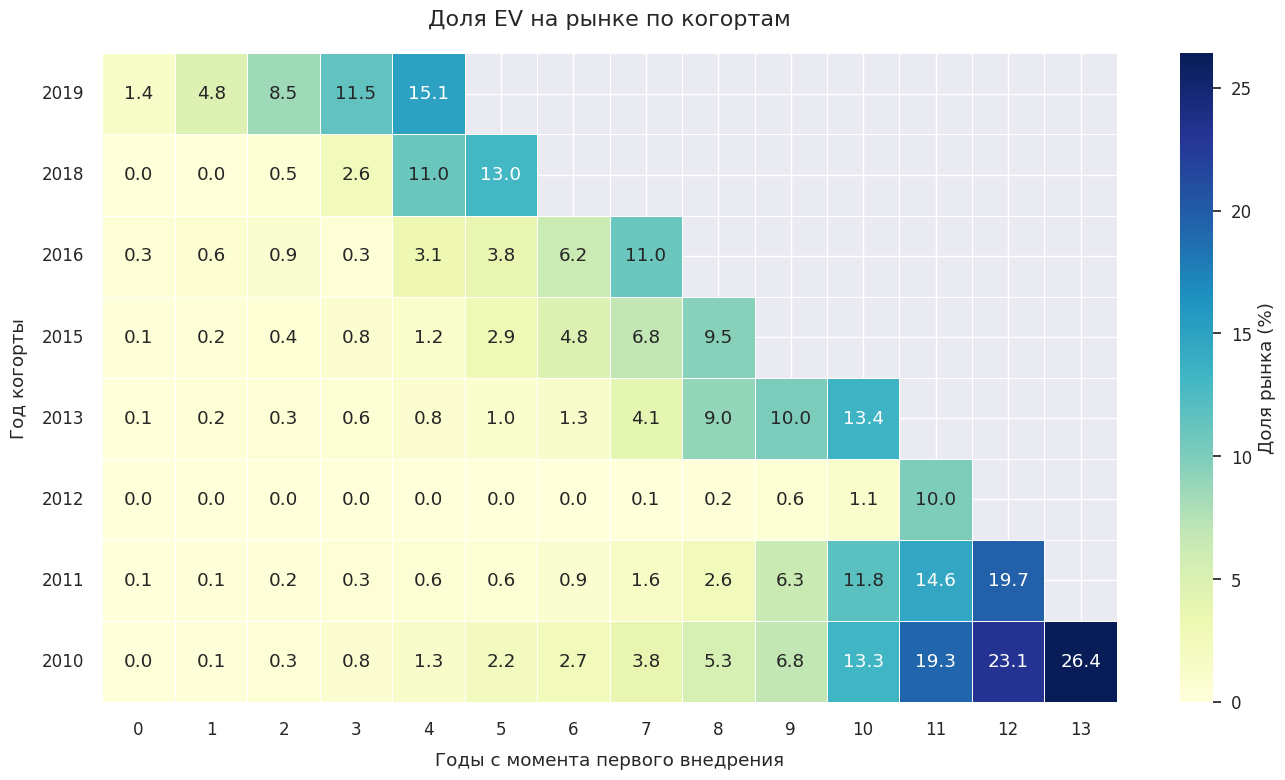

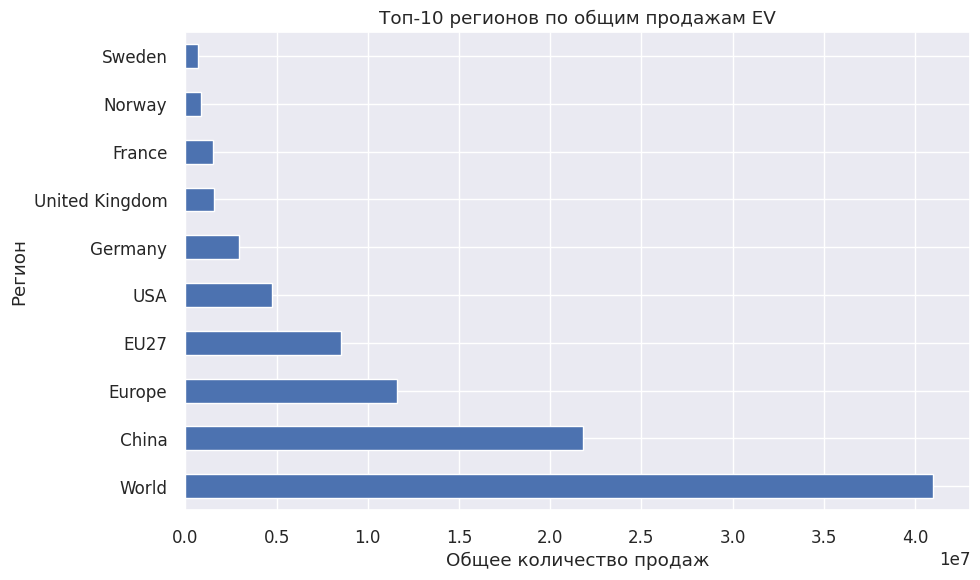

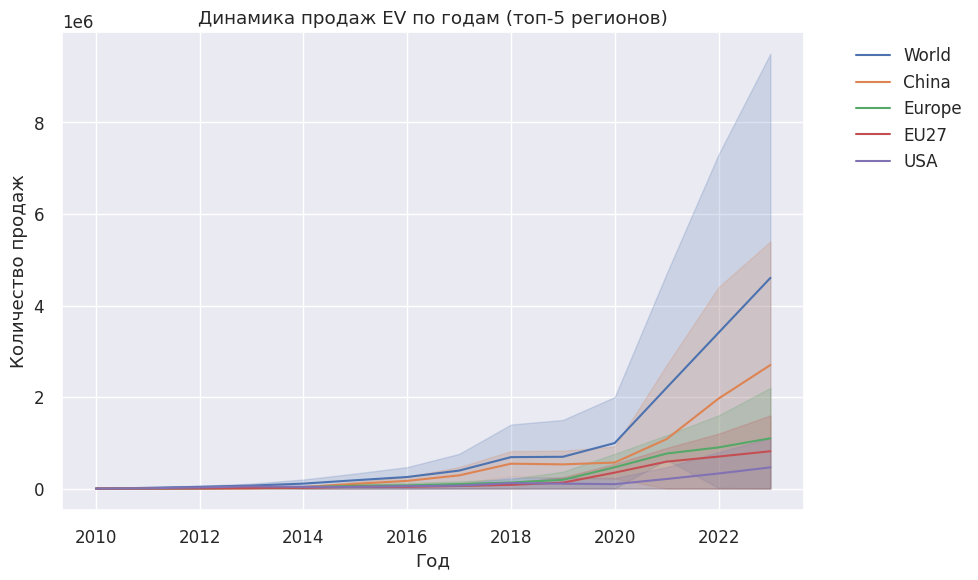

<Figure size 1200x600 with 0 Axes>

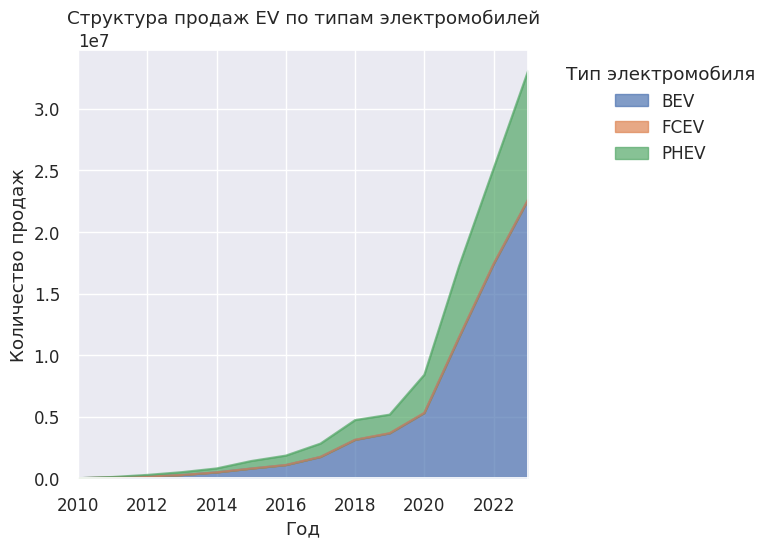

ОТЧЕТ ПО АНАЛИЗУ ПРОДАЖ ЭЛЕКТРОМОБИЛЕЙ (КОГОРТНЫЙ АНАЛИЗ)

1. ДИНАМИКА ПРОДАЖ ПО КОГОРТАМ:
powertrain                            BEV     FCEV       PHEV
cohort_year years_since_cohort                               
2010        0                     16273.0    101.0     1103.0
            1                     96616.0    152.0    18453.0
            2                    144379.0    118.0   136586.0
            3                    273140.0    161.0   230135.0
            4                    480401.0    241.2   316118.0
            5                    780641.0   1695.0   601648.0
            6                   1067450.0   5049.0   747797.0
            7                   1713140.0   7557.0  1056340.0
            8                   3079900.0   9406.0  1550890.0
            9                   3572720.0  16008.0  1450707.0

2. ДОЛЯ РЫНКА EV ПО КОГОРТАМ (%):
years_since_cohort        0         1         2          3          4   \
cohort_year                                             

In [37]:
def main():
    # Загрузка данных
    try:
        drive.mount('/content/drive')
        path = '/content/drive/MyDrive/IEA-EV-dataEV_salesHistoricalCars.csv'
        df = load_and_preprocess_data(path)
    except FileNotFoundError:
        print("Ошибка: Файл данных не найден!")
        return

    # Анализ данных
    cohort_sales, cohort_share, region_growth, top_regions = analyze_cohorts(df)

    # Визуализация результатов
    visualize_results(cohort_sales, cohort_share, region_growth, top_regions, df)

    # Генерация отчета
    generate_report(cohort_sales, cohort_share, region_growth, top_regions)

if __name__ == "__main__":
    main()

In [46]:
import pandas as pd

def analyze_and_save_ev_cohorts(df, output_file='ev_cohort_analysis.xlsx'):

    # Проверяем доступные столбцы
    print("Доступные столбцы в DataFrame:", df.columns.tolist())

    # Группировка данных по когортам и агрегация метрик (используем только существующие столбцы)
    grouped_data = df.groupby(['cohort_year', 'powertrain']).agg(
        Total_Sales = ('value', 'sum'),               # Суммарные продажи
        Average_Sales = ('value', 'mean'),            # Средние продажи
        Number_of_Regions = ('region', 'nunique'),    # Количество уникальных регионов
        # Убираем Market_Share, так как этого столбца нет в данных
    ).reset_index()

    # Переименование колонок для понятности
    grouped_data = grouped_data.rename(columns={
        'cohort_year': 'Cohort Year',
        'powertrain': 'EV Type',
        'Total_Sales': 'Total Sales',
        'Average_Sales': 'Average Sales (per region)',
        'Number_of_Regions': 'Number of Regions'
    })

    # Вычисление дополнительных метрик
    grouped_data['Sales per Region'] = grouped_data['Total Sales'] / grouped_data['Number of Regions']

# Добавляем годы с момента внедрения (years_since_cohort)
    grouped_data = df.groupby(['cohort_year', 'years_since_cohort', 'powertrain']).agg(
    Total_Sales=('value', 'sum'),
    Average_Sales=('value', 'mean'),
    Number_of_Regions=('region', 'nunique')).reset_index()

    # Сохранение результатов в Excel
    try:
        grouped_data.to_excel(output_file, index=False)
        print(f"Результаты успешно сохранены в файл: {output_file}")
    except Exception as e:
        print(f"Ошибка при сохранении файла: {e}")

    # Вывод первых 50 строк для проверки
    print("\nРезультаты анализа (первые 50 строк):")
    print(grouped_data.head(50))

    return grouped_data

# Пример использования:
path = '/content/drive/MyDrive/IEA-EV-dataEV_salesHistoricalCars.csv'
df = load_and_preprocess_data(path)
analysis_results = analyze_and_save_ev_cohorts(df, 'ev_sales_analysis.xlsx')
from google.colab import files
files.download('ev_sales_analysis.xlsx')

Первоначальный размер данных: (3798, 8)
Пропущенные значения:
region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64
Размер после удаления дубликатов: (3798, 8)
Размер после фильтрации по параметрам: (1945, 8)
Размер после удаления аномалий: (1331, 8)

Информация о финальном датафрейме:
Количество регионов: 52
Годы в данных: от 2010 до 2023
Типы параметров: ['EV sales', 'EV sales share']
Доступные столбцы в DataFrame: ['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit', 'value', 'cohort_year', 'years_since_cohort']
Результаты успешно сохранены в файл: ev_sales_analysis.xlsx

Результаты анализа (первые 50 строк):
    cohort_year  years_since_cohort powertrain   Total_Sales  Average_Sales  \
0          2010                   0        BEV  1.627300e+04     813.650000   
1          2010                   0         EV  5.071500e-01       0.024150   
2          2010                   0 

<ipython-input-24-0f3eb19ddce6>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['ev_penetration'] = np.where(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>